# Drone Vs Bird Detection using YOLOv7

Dataset collected and shortened to a few images for experimentation purposes from https://data.mendeley.com/datasets/6ghdz52pd7/5

### 1. Install Necessary Packages

In [1]:
# Install necessary packages
!pip install torch torchvision torchaudio
!pip install opencv-python-headless
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
!pip install -r requirements.txt

fatal: destination path 'yolov7' already exists and is not an empty directory.
/content/yolov7


### 2. Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 3. Verify Dataset Structure

Change to the dataset directory and verify its contents:

In [3]:
import os

In [4]:
# Change to the dataset directory
%cd /content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset

# Verify dataset structure
dataset_path = "/content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset"
print(os.listdir(dataset_path))

# Check contents of the data.yaml file
data_yaml_path = os.path.join(dataset_path, 'data.yaml')
with open(data_yaml_path, 'r') as file:
    print(file.read())

/content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset
['data.yaml', 'README.roboflow.txt', 'README.md', 'README.dataset.txt', 'valid', 'train', 'test']
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Drone','Bird']




### 4. Prepare Data YAML File

Ensure the data.yaml file is correctly configured:

In [5]:
# Update data.yaml file to point to the correct dataset directories
data_yaml = """
train: /content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/train/images
val: /content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/valid/images
test: /content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/test/images

nc: 2  # number of classes
names: ['bird', 'drone']  # class names
"""

# Save the updated data.yaml file in the yolov7 directory
with open('/content/yolov7/data.yaml', 'w') as file:
    file.write(data_yaml)

### 5. Ensure Hyperparameter YAML File

We will use the available hyp.scratch.custom.yaml file:

In [6]:
# Verify the presence of hyp.scratch.custom.yaml
hyp_yaml_path = '/content/yolov7/data/hyp.scratch.custom.yaml'

# Ensure the file exists
if not os.path.exists(hyp_yaml_path):
    raise FileNotFoundError(f'{hyp_yaml_path} not found.')


### 6. Run Training

Make sure we are in the yolov7 directory and run the training script:

In [7]:
# Verify train directory structure
train_images_path = "/content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/train/images"
train_labels_path = "/content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/train/labels"
print("Train Images:", os.listdir(train_images_path)[:5])  # Display first 5 files
print("Train Labels:", os.listdir(train_labels_path)[:5])  # Display first 5 files

# Verify validation directory structure
val_images_path = "/content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/valid/images"
val_labels_path = "/content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/valid/labels"
print("Validation Images:", os.listdir(val_images_path)[:5])  # Display first 5 files
print("Validation Labels:", os.listdir(val_labels_path)[:5])  # Display first 5 files

# Verify test directory structure
test_images_path = "/content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/test/images"
test_labels_path = "/content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/test/labels"
print("Test Images:", os.listdir(test_images_path)[:5])  # Display first 5 files
print("Test Labels:", os.listdir(test_labels_path)[:5])  # Display first 5 files


Train Images: ['BTR (11).jpg', 'BTR (1).jpg', 'BTR (10).jpg', 'BTR (13).jpg', 'BTR (12).jpg']
Train Labels: ['BTR (1).txt', 'BTR (10).txt', 'BTR (12).txt', 'BTR (11).txt', 'BTR (13).txt']
Validation Images: ['BV (2).jpg', 'BV (3).jpg', 'BV (4).jpg', 'BV (5).jpg', 'DV (441).jpg']
Validation Labels: ['BV (2).txt', 'BV (3).txt', 'BV (4).txt', 'BV (5).txt', 'DV (443).txt']
Test Images: ['BT (4).jpg', 'BT (3).jpg', 'BT (2).jpg', 'BT (5).jpg', 'DT (440).jpg']
Test Labels: ['BT (5).txt', 'BT (4).txt', 'BT (3).txt', 'BT (2).txt', 'DT (440).txt']


In [8]:
# Go to the YOLOv7 directory
%cd /content/yolov7

# List files to ensure you are in the correct directory
!ls

# Train the YOLOv7 model
!python train.py --img 640 --batch 16 --epochs 200 --data data.yaml --cfg cfg/training/yolov7.yaml --weights yolov7.pt --name yolov7-drone-bird --hyp data/hyp.scratch.custom.yaml


/content/yolov7
cfg	   deploy     figure	  LICENSE.md  README.md		test.py       train.py
data	   detect.py  hubconf.py  models      requirements.txt	tools	      utils
data.yaml  export.py  inference   paper       scripts		train_aux.py
2024-05-29 23:31:07.717181: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 23:31:07.717251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 23:31:07.719451: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-29 23:31:07.731030: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use availa

### Performing Detection on Test Set

In [9]:
#Navigate to the YOLOv7 Directory:
#Ensure you are in the YOLOv7 directory.
%cd /content/yolov7

/content/yolov7


In [10]:
# Run Detection:
!python detect.py --weights runs/train/yolov7-drone-bird/weights/best.pt --source '/content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/test/images/DT (443).jpg' --img 640 --conf 0.25 --name yolov7-drone-bird-detection

Namespace(weights=['runs/train/yolov7-drone-bird/weights/best.pt'], source='/content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/test/images/DT (443).jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='yolov7-drone-bird-detection', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 

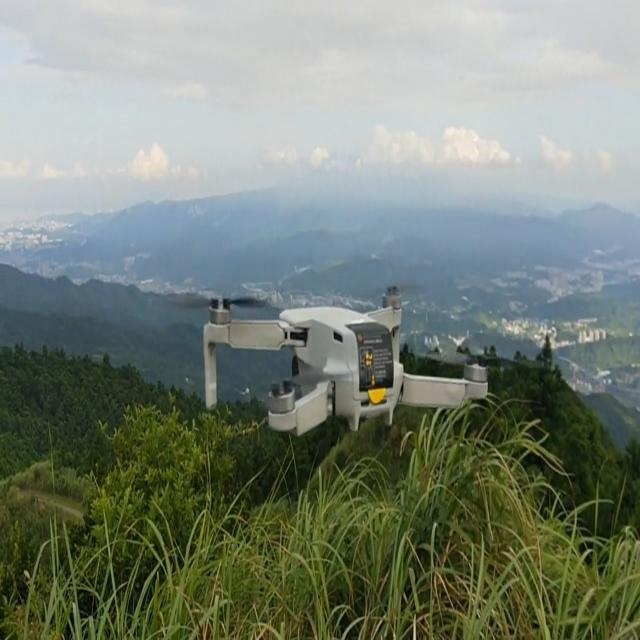

In [13]:
# View detection result
from IPython.display import Image

result_image_path = 'runs/detect/yolov7-drone-bird-detection/DT (443).jpg'
display(Image(filename=result_image_path))


### Automating Detection and Display on all test set images

In [14]:
%cd /content/yolov7

/content/yolov7


In [15]:
!python detect.py --weights runs/train/yolov7-drone-bird/weights/best.pt --source /content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/test/images/ --img 640 --conf 0.25 --name yolov7-drone-bird-detection

Namespace(weights=['runs/train/yolov7-drone-bird/weights/best.pt'], source='/content/drive/MyDrive/Mendeley_Small_Drone_Bird_Dataset/DroneVBird_Dataset/test/images/', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='yolov7-drone-bird-detection', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36487166 parameters, 6194944 grad

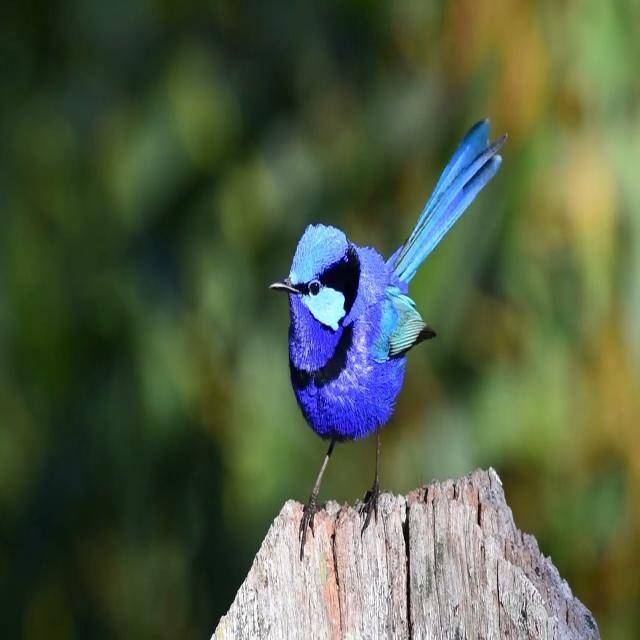

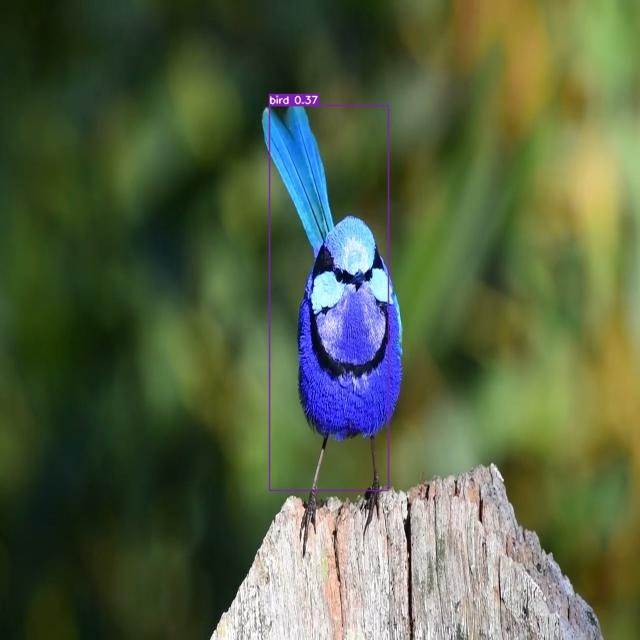

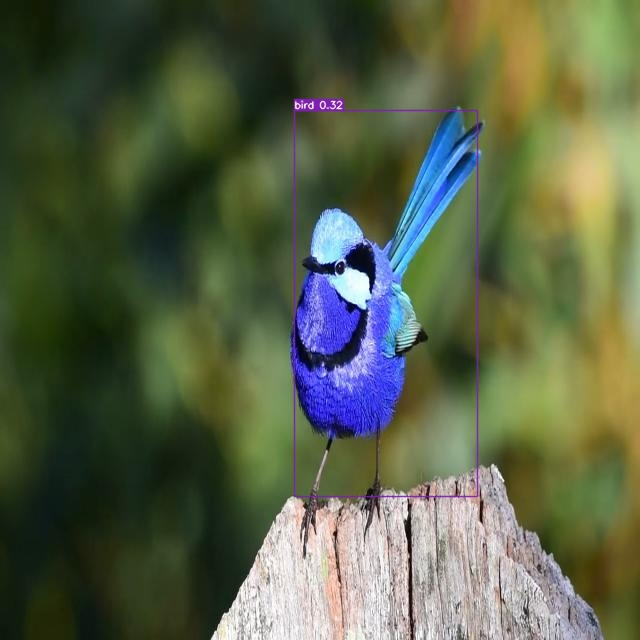

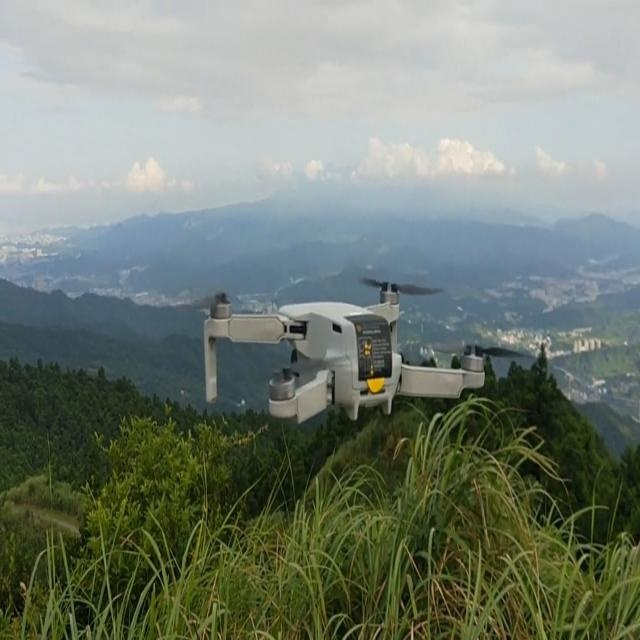

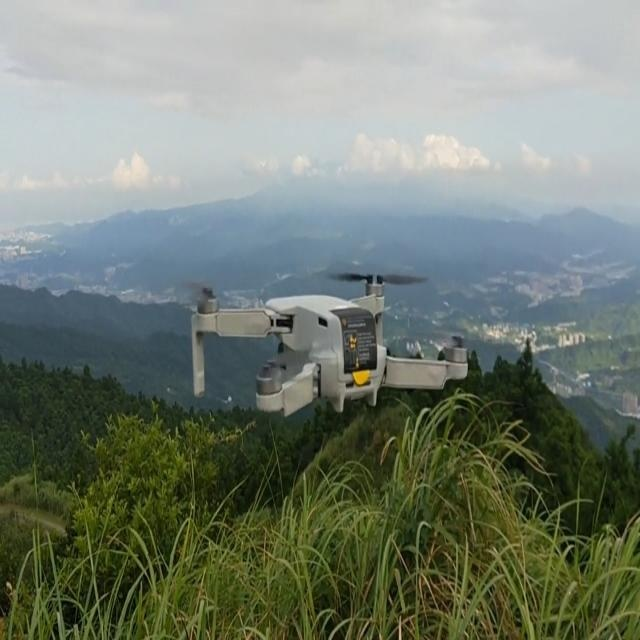

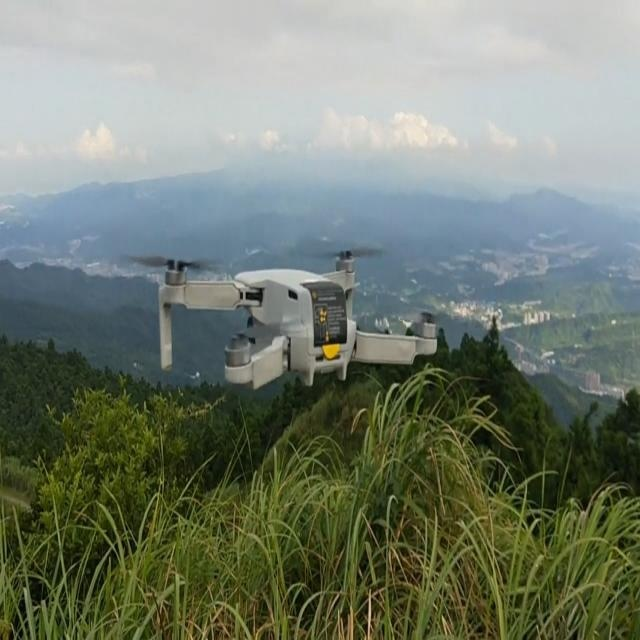

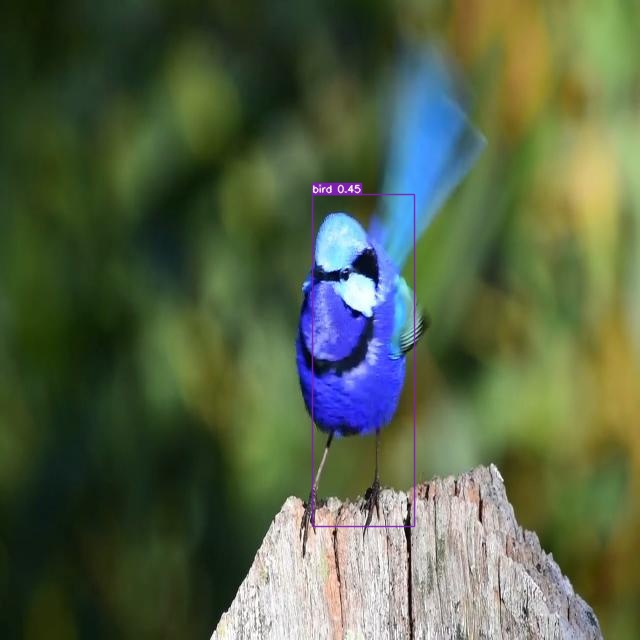

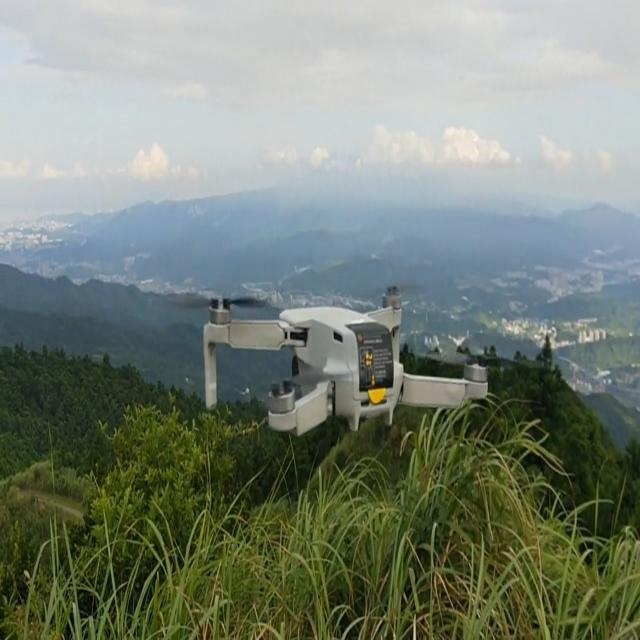

In [17]:
import os
from IPython.display import Image, display

result_dir = 'runs/detect/yolov7-drone-bird-detection2'
result_images = [f for f in os.listdir(result_dir) if os.path.isfile(os.path.join(result_dir, f))]

for img_file in result_images:
    display(Image(filename=os.path.join(result_dir, img_file)))
